In [1]:
from transformers import AutoTokenizer, AutoConfig
from dataset_utils import preprocessing_dataset
from tqdm.auto import tqdm
import pandas as pd

/opt/conda/lib/python3.8/site-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (2.1.0) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


In [ ]:
pip install ipywidgets

In [2]:
tokenizer = AutoTokenizer.from_pretrained("klue/roberta-large")
model_config = AutoConfig.from_pretrained("klue/roberta-large")

In [3]:
train_data = pd.read_csv("../dataset/train/train.csv")

In [4]:
train_data = preprocessing_dataset(train_data)

In [5]:
data = []
for _, item in tqdm(train_data.iterrows(), desc="tokenizing", total=len(train_data)):
    subj = item["subject_entity"]
    obj = item["object_entity"]

    concat_entity = tokenizer.sep_token.join([subj, obj])
    output = tokenizer(concat_entity, item["sentence"], add_special_tokens=True)
    data.append(len(output["input_ids"]))

In [ ]:
pip install matplotlib

In [6]:
import matplotlib.pyplot as plt

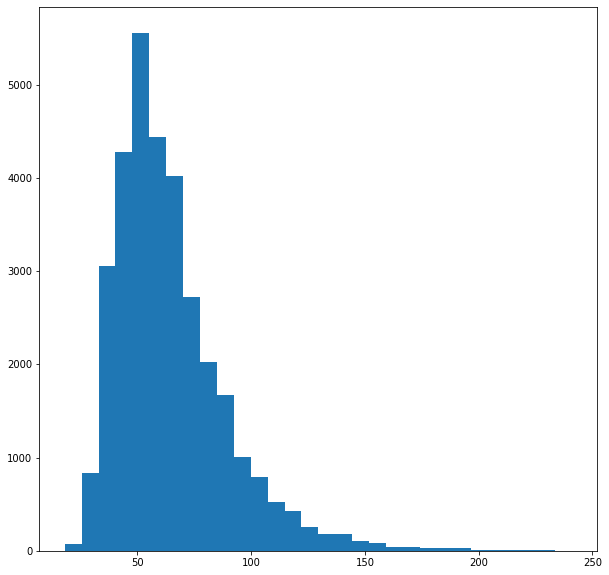

In [7]:
plt.figure(figsize=(10,10))
plt.hist(data, bins=30)
plt.show()

In [8]:
new_data = [x for x in data if x > 195]

In [9]:
print("max:",max(data))
print("190보다 긴 data의 수 : ", len(new_data))

max: 241
190보다 긴 data의 수 :  55


In [4]:
subject_word = "비틀즈"
object_word = "조지 해리슨"
temp = subject_word + "[SEP]" + object_word
sentence = "〈Something〉는 조지 해리슨이 쓰고 비틀즈가 1969년 앨범 《Abbey Road》에 담은 노래다."
encoded_data = tokenizer(temp, sentence)

In [5]:
encoded_data

{'input_ids': [0, 29830, 2, 8373, 14113, 2234, 2, 168, 30985, 14451, 7088, 4586, 169, 793, 8373, 14113, 2234, 2052, 1363, 2088, 29830, 2116, 14879, 2440, 6711, 170, 21406, 26713, 2076, 25145, 5749, 171, 1421, 818, 2073, 4388, 2062, 18, 2], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [5]:
ddd = encoded_data["input_ids"]
tokenizer.decode(ddd)

'[CLS] 비틀즈[SEP] 조지 해리슨[SEP] 〈Something〉는 조지 해리슨이 쓰고 비틀즈가 1969년 앨범 《Abbey Road》에 담은 노래다.[SEP]'